Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data

In [3]:
dd = pd.read_excel('Data Set.xlsx')
dd.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [4]:
df = dd.drop(columns = ['custid', 'birthmonth'])

In [5]:
df.head()

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,20,2,15,3,1,1,0,...,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,22,2,17,4,2,0,0,...,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,67,6,14,2,2,0,16,...,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,23,2,16,3,2,0,0,...,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,26,3,16,3,2,0,1,...,1,0,1,0,1,0,0,0,1,0


In [6]:
df.dtypes

region           int64
townsize       float64
gender           int64
age              int64
agecat           int64
                ...   
ownfax           int64
news             int64
response_01      int64
response_02      int64
response_03      int64
Length: 128, dtype: object

In [7]:
from pandas_profiling import ProfileReport

In [8]:
#ProfileReport(df)

In [9]:
cat_var=['region','townsize','gender','agecat','edcat','jobcat','union','empcat','retire','inccat',
         'default','jobsat','marital','spousedcat','homeown','hometype','addresscat','cars','carown','cartype',
         'carcatvalue','carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle','commutecarpool',
         'commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason',
         'polview','polparty','polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat',
         'card2','card2type','card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree',
         'equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward','confer','ebill',
         'owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02',
         'response_03']

In [10]:
num_var = []
for var in df.columns:
    if var not in cat_var:
        num_var.append(var)

In [11]:

print ('Number of numerical variables   :-  {}'.format(len(num_var)))
print ('Number of categorical variables :-  {}'.format(len(cat_var)))

Number of numerical variables   :-  47
Number of categorical variables :-  81


In [12]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [13]:
for var in cat_var:
    df[var] = df[var].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 128 entries, region to response_03
dtypes: category(81), float64(30), int64(17)
memory usage: 2.2 MB


In [15]:
df.loc[:,cat_var].apply(categorical_var_summary).T.sort_values('NMISS',ascending=False).head(10)

,N,NMISS,MODE,FREQ,PERCENT
townsize,4998.0,2.0,1.0,1436.0,28.73
voice,5000.0,0.0,0.0,3485.0,69.70
wireless,5000.0,0.0,0.0,3656.0,73.12
callcard,5000.0,0.0,1.0,3581.0,71.62
equip,5000.0,0.0,0.0,3296.0,65.92
tollfree,5000.0,0.0,0.0,2622.0,52.44
churn,5000.0,0.0,0.0,3734.0,74.68
bfast,5000.0,0.0,3.0,1875.0,37.50
active,5000.0,0.0,0.0,2670.0,53.40
card2tenurecat,5000.0,0.0,5.0,1923.0,38.46


In [16]:
df.loc[:,num_var].apply(continuous_var_summary).T.round(1).sort_values('NMISS',ascending=False).head(10)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
lnwireten,1344.0,3656.0,9150.1,6.8,7.1,1.3,1.6,2.5,3.0,4.1,4.9,6.2,7.1,7.8,8.1,8.3,8.7,9.5
lnwiremon,1344.0,3656.0,4845.1,3.6,3.6,0.4,0.2,2.5,2.8,3.0,3.1,3.3,3.6,3.9,4.1,4.3,4.6,5.2
lnequipten,1704.0,3296.0,11497.4,6.7,7.1,1.2,1.4,2.5,3.2,4.3,5.0,6.2,7.1,7.6,8.0,8.1,8.4,8.8
lnequipmon,1704.0,3296.0,6134.8,3.6,3.6,0.3,0.1,2.8,3.0,3.1,3.2,3.4,3.6,3.8,4.0,4.1,4.3,4.7
lntollmon,2378.0,2622.0,7712.4,3.2,3.2,0.4,0.2,2.1,2.3,2.6,2.7,3.0,3.2,3.5,3.8,3.9,4.2,4.6
lntollten,2378.0,2622.0,15658.6,6.6,6.9,1.2,1.5,2.2,2.8,4.2,4.8,5.9,6.9,7.5,7.9,8.1,8.4,8.8
lncardten,3578.0,1422.0,22993.3,6.4,6.6,1.2,1.4,1.6,2.5,4.1,4.9,5.9,6.6,7.2,7.7,7.9,8.4,9.5
lncardmon,3581.0,1419.0,10419.8,2.9,2.9,0.6,0.3,1.2,1.7,2.0,2.2,2.5,2.9,3.3,3.6,3.8,4.2,5.2
longten,4997.0,3.0,3542232.2,708.9,350.0,979.3,959011.0,0.9,2.4,12.6,28.3,104.6,350.0,913.8,1808.8,2567.6,4689.1,13046.5
lnlongten,4997.0,3.0,28039.7,5.6,5.9,1.6,2.7,-0.1,0.9,2.5,3.3,4.7,5.9,6.8,7.5,7.9,8.5,9.5


In [17]:
drop_list = ['lnwireten', 'lnwiremon', 'lnequipten', 'lnequipmon', 'lntollten', 'lntollmon', 'lncardten', 'lncardmon', 'longten', 'lnlongten', 'address', 'employ']

df.drop(columns=drop_list, inplace=True)

Outlier treatment for numerical 

In [18]:
for var in drop_list:
    if var in num_var:
        num_var.remove(var)
        
df.loc[:,num_var] = df.loc[:,num_var].apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

Missing Val Treatement

In [19]:
df.loc[:,num_var] = df.loc[:,num_var].apply(missing_imputation)
df.loc[:,cat_var]  = df.loc[:,cat_var].apply(missing_imputation)

Dummy Val Creation

In [ ]:
ProfileReport(df)

In [20]:
#Creating Dummy variables
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [21]:
#df.loc[:, cat_var] = create_dummies(df.loc[:,cat_var], cat_var)

cat_vars = df.loc[:,cat_var]

In [22]:
cat_vars = create_dummies(cat_vars, cat_var)

In [23]:
df.loc[:,num_var].columns

Index(['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt',
       'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats',
       'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small',
       'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime',
       'cardspent', 'card2spent', 'tenure', 'longmon', 'lnlongmon', 'tollmon',
       'tollten', 'equipmon', 'equipten', 'cardmon', 'cardten', 'wiremon',
       'wireten', 'hourstv'],
      dtype='object')

In [24]:
final_dataset = pd.concat([df.loc[:,num_var], cat_vars], axis = 1)

In [25]:
final_dataset.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,...,0,0,0,1,1,0,0,0,1,0
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,...,1,1,1,1,1,1,1,0,0,0
2,67,14,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,...,1,0,0,0,0,0,1,0,0,0
3,23,16,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,...,1,0,1,1,1,0,1,1,0,0
4,26,16,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,...,1,0,1,0,1,0,0,0,1,0


In [34]:
final_dataset['cards_spent']=final_dataset.cardspent+final_dataset.card2spent
final_dataset.drop(columns=['cardspent','card2spent'],inplace=True)

AttributeError: 'DataFrame' object has no attribute 'cardspent'

In [27]:
sns.distplot(final_dataset.cards_spent)
plt.show()
final_dataset['ln_cards_spent']=np.log(final_dataset['cards_spent']+1)
sns.distplot(final_dataset.ln_cards_spent)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  """


In [43]:
corrm = final_dataset.corr()
corrm.to_csv('corrm.csv')
corrm

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1,cards_spent,ln_cards_spent
age,1.000000,-0.093966,0.208286,0.142984,0.039031,0.142401,0.108046,0.154514,0.127005,-0.002796,...,-0.133284,-0.217524,-0.235226,-0.042090,0.365204,0.015140,0.013175,-0.026231,0.031339,0.005940
ed,-0.093966,1.000000,0.186802,0.206332,0.013871,0.122362,0.129920,0.135869,0.154458,0.113928,...,0.435623,0.369831,0.377019,0.276163,-0.073510,-0.117333,0.073750,0.107912,0.100796,0.098199
income,0.208286,0.186802,1.000000,0.898172,0.011586,0.627578,0.531251,0.696227,0.597843,0.035491,...,0.049270,0.032922,0.040452,0.149388,0.138730,-0.002440,0.062895,0.053011,0.378967,0.355900
lninc,0.142984,0.206332,0.898172,1.000000,0.013177,0.566972,0.583808,0.636798,0.666062,0.045417,...,0.057608,0.061467,0.060089,0.146191,0.108047,-0.001206,0.061287,0.060666,0.398263,0.405331
debtinc,0.039031,0.013871,0.011586,0.013177,1.000000,0.462598,0.552941,0.526964,0.628006,-0.040150,...,0.008897,0.014713,0.005524,0.003251,0.005278,0.006831,0.003684,0.019776,0.015604,0.015708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
response_01_1,0.015140,-0.117333,-0.002440,-0.001206,0.006831,0.000131,-0.002961,0.008472,0.007010,-0.007956,...,-0.107194,-0.069870,-0.096176,-0.014592,0.020919,1.000000,-0.015601,-0.018781,-0.007496,-0.008874
response_02_1,0.013175,0.073750,0.062895,0.061287,0.003684,0.029993,0.025132,0.052683,0.049590,0.032120,...,0.039891,0.015485,0.011744,0.032549,0.030136,-0.015601,1.000000,0.028266,0.022498,0.027194
response_03_1,-0.026231,0.107912,0.053011,0.060666,0.019776,0.040907,0.054076,0.041894,0.045314,0.001544,...,0.089388,0.072791,0.094278,0.093360,-0.011148,-0.018781,0.028266,1.000000,0.051618,0.061744
cards_spent,0.031339,0.100796,0.378967,0.398263,0.015604,0.249670,0.248492,0.275536,0.268053,0.026180,...,0.050713,0.031155,0.026651,0.058961,0.040633,-0.007496,0.022498,0.051618,1.000000,0.909764


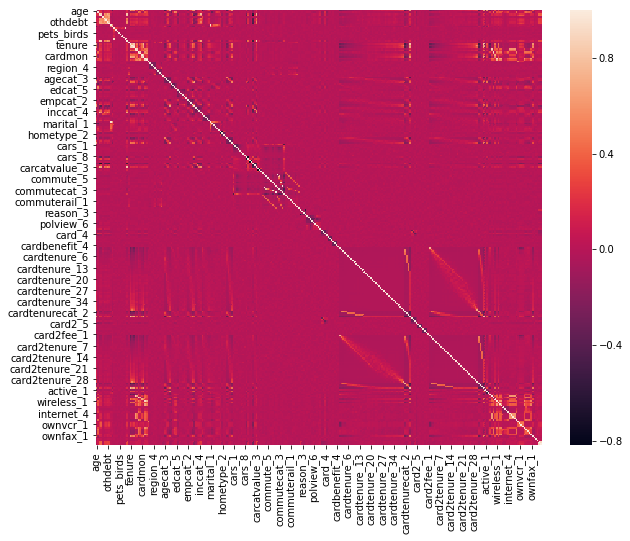

In [28]:
%matplotlib inline
# heatmap showing correlation
plt.figure(figsize = (10, 8))
sns.heatmap(final_dataset.corr())
plt.show()

In [39]:
final_dataset.drop(columns=['cards_spent'],inplace=True)

In [56]:
final_dataset.drop(columns=['income', 'pets_freshfish', 'carvalue', 'longmon', 'lnlongmon', 'tollten', 'equipten'],inplace=True)

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_dataset.iloc[:, 0:264], final_dataset['ln_cards_spent'],  test_size=0.3, random_state=0)

Feature Importance Using Random Forest Classification

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [62]:
param_grid = {'n_estimators' : np.arange(10,25)}
tree = GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True), param_grid, cv=10)
tree.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=True),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': array([10, 11, 

In [63]:
tree.best_score_

0.20452615662185436

In [64]:
tree.best_params_

{'n_estimators': 23}

In [65]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=19)
radm_clf.fit( x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=19,
                      n_jobs=None, oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [66]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(10):
  feature_rank.loc[f] = [f+1,
                         x_train.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,lninc,0.195571
1,2,tenure,0.024560
2,3,debtinc,0.024012
3,4,hourstv,0.022355
4,5,commutetime,0.022011
5,6,age,0.019868
6,7,lncreddebt,0.019266
7,8,cardmon,0.019125
8,9,reason_2,0.018973
9,10,cardten,0.018803


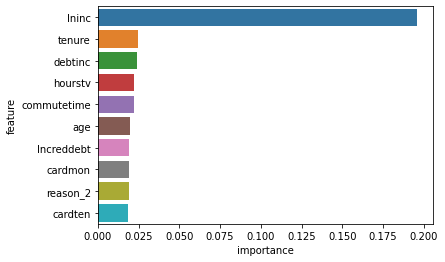

In [67]:
from sklearn import metrics
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(10):
  feature_rank.loc[f] = [f+1,
                         x_train.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [71]:
#Select features and then convert it into list
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(x_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         x_train.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]

x=feature_rank.loc[0:75,['feature']]
x=x['feature'].tolist()
print(x)

['lninc', 'tenure', 'debtinc', 'hourstv', 'commutetime', 'age', 'lncreddebt', 'cardmon', 'reason_2', 'cardten', 'creddebt', 'othdebt', 'card_2', 'ed', 'card_4', 'card_3', 'pets', 'lnothdebt', 'tollmon', 'equipmon', 'spoused', 'card2_2', 'reside', 'pets_dogs', 'gender_1', 'card2_3', 'pets_cats', 'pets_birds', 'wiremon', 'wireten', 'carbought_0', 'reason_9', 'active_1', 'card_5', 'carbought_1', 'vote_1', 'polview_4', 'region_3', 'multline_1', 'carbuy_1', 'voice_1', 'cardfee_1', 'commutebus_1', 'townsize_3.0', 'commutewalk_1', 'card2type_3', 'cardbenefit_3', 'owngame_1', 'cartype_1', 'hometype_2', 'owncd_1', 'card2benefit_3', 'cardbenefit_2', 'cardtype_3', 'response_02_1', 'jobsat_4', 'bfast_3', 'commuterail_1', 'card2benefit_4', 'polparty_1', 'cardbenefit_4', 'jobsat_2', 'cars_1', 'cardtype_4', 'region_2', 'commutecarpool_1', 'callwait_1', 'response_01_1', 'default_1', 'card2type_4', 'card2tenure_7', 'polview_6', 'polview_3', 'jobcat_2', 'cardtype_2', 'card2type_2']


In [85]:
rf_features = ['lninc', 'tenure', 'debtinc', 'hourstv', 'commutetime', 'age', 'lncreddebt', 'cardmon', 'reason_2', 'cardten', 'creddebt', 'othdebt', 'card_2', 'ed', 'card_4', 'card_3', 'pets', 'lnothdebt', 'tollmon', 'equipmon', 'spoused', 'card2_2', 'reside', 'pets_dogs', 'gender_1', 'card2_3', 'pets_cats', 'pets_birds', 'wiremon', 'wireten', 'carbought_0', 'reason_9', 'active_1', 'card_5', 'carbought_1', 'vote_1', 'polview_4', 'region_3', 'multline_1', 'carbuy_1', 'voice_1', 'cardfee_1', 'commutebus_1', 'commutewalk_1', 'card2type_3', 'cardbenefit_3', 'owngame_1', 'cartype_1', 'hometype_2', 'owncd_1', 'card2benefit_3', 'cardbenefit_2', 'cardtype_3', 'response_02_1', 'jobsat_4', 'bfast_3', 'commuterail_1', 'card2benefit_4', 'polparty_1', 'cardbenefit_4', 'jobsat_2', 'cars_1', 'cardtype_4', 'region_2', 'commutecarpool_1', 'callwait_1', 'response_01_1', 'default_1', 'card2type_4', 'card2tenure_7', 'polview_6', 'polview_3', 'jobcat_2', 'cardtype_2', 'card2type_2', 'ln_cards_spent']

In [86]:
reg_data = final_dataset[rf_features]

MultiColliniarity


In [87]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [88]:
del rf_features[-1]

In [89]:
%%capture
#gather features
features = "+".join(rf_features)

In [90]:
features

'lninc+tenure+debtinc+hourstv+commutetime+age+lncreddebt+cardmon+reason_2+cardten+creddebt+othdebt+card_2+ed+card_4+card_3+pets+lnothdebt+tollmon+equipmon+spoused+card2_2+reside+pets_dogs+gender_1+card2_3+pets_cats+pets_birds+wiremon+wireten+carbought_0+reason_9+active_1+card_5+carbought_1+vote_1+polview_4+region_3+multline_1+carbuy_1+voice_1+cardfee_1+commutebus_1+commutewalk_1+card2type_3+cardbenefit_3+owngame_1+cartype_1+hometype_2+owncd_1+card2benefit_3+cardbenefit_2+cardtype_3+response_02_1+jobsat_4+bfast_3+commuterail_1+card2benefit_4+polparty_1+cardbenefit_4+jobsat_2+cars_1+cardtype_4+region_2+commutecarpool_1+callwait_1+response_01_1+default_1+card2type_4+card2tenure_7+polview_6+polview_3+jobcat_2+cardtype_2+card2type_2'

In [91]:
y, X = dmatrices('ln_cards_spent~' + features,reg_data, return_type='dataframe')

In [92]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(by=['VIF Factor'],ascending=False)

,VIF Factor,features
0,339.835680,Intercept
10,8.713446,cardten
29,8.146971,wiremon
18,7.559031,lnothdebt
1,7.446974,lninc
...,...,...
43,1.026522,commutebus_1
54,1.023648,response_02_1
57,1.019182,commuterail_1
65,1.018717,commutecarpool_1


In [93]:
vif1=vif[vif['VIF Factor']>10].reset_index().loc[:,['features']]
vif1.drop([0],axis=0,inplace=True)
drop_vars= vif1["features"].tolist()
drop_vars

[]

 Check 3 - All x variables should have a linear relationship with Y

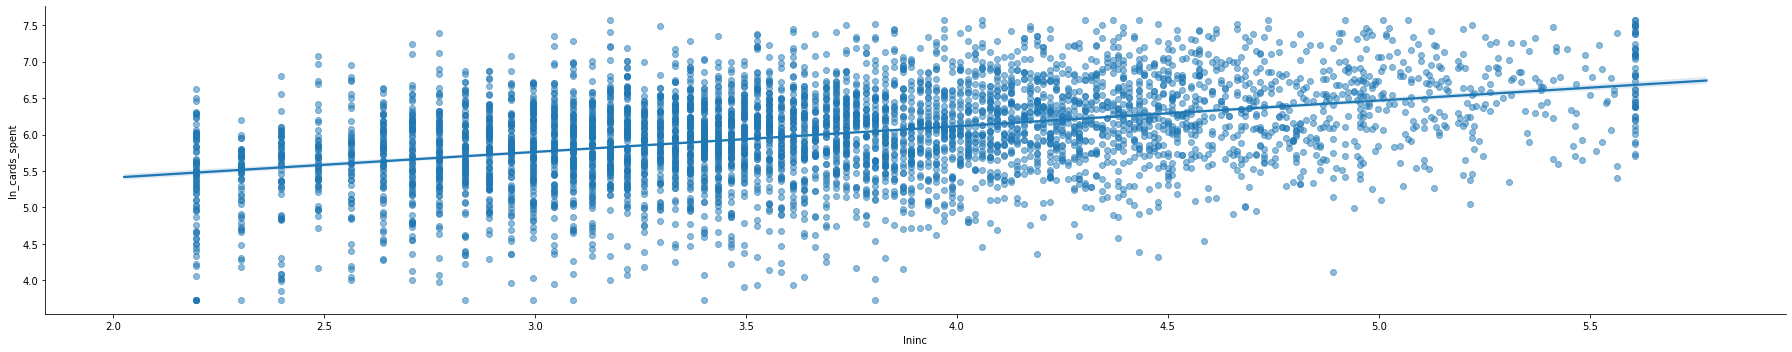

In [96]:
sns.lmplot(x="lninc",y="ln_cards_spent",data=reg_data,aspect=5,scatter_kws={'alpha':0.5})

In [101]:
train_x,test_x,train_y,test_y=train_test_split(reg_data.iloc[:,0:75],
                                              reg_data['ln_cards_spent'],
                                               test_size=.2,
                                               random_state=123)

In [105]:
import statsmodels.api as sm
train_x = sm.add_constant(train_x)
test_x=sm.add_constant(test_x)
lm=sm.OLS(train_y,train_x).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [106]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_cards_spent   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     25.32
Date:                Thu, 30 Jul 2020   Prob (F-statistic):          8.26e-277
Time:                        19:46:07   Log-Likelihood:                -3169.3
No. Observations:                4000   AIC:                             6491.
Df Residuals:                    3924   BIC:                             6969.
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.3500      0.158  

In [107]:
lm.pvalues.sort_values(ascending=False)

cardbenefit_3     9.967866e-01
spoused           9.735086e-01
carbought_1       9.725945e-01
tollmon           9.608938e-01
cardbenefit_2     9.598310e-01
                     ...      
lninc             2.885166e-24
card_3            6.733363e-74
card_2            2.987738e-75
card_4            3.437805e-86
const            1.187183e-221
Length: 76, dtype: float64

In [108]:
print('Parameters:', lm.params) # Find the parameters of x i.e Beta value
print('R2: ', lm.rsquared) # Find the r**2

Parameters: const          5.349987
lninc          0.325163
tenure        -0.000334
debtinc       -0.001893
hourstv        0.001150
                 ...   
polview_6      0.006216
polview_3     -0.035821
jobcat_2       0.023158
cardtype_2     0.018216
card2type_2   -0.012219
Length: 76, dtype: float64
R2:  0.3261185786849188


## Evaluation of model accuracy

In [109]:
test_pred=lm.predict(test_x)

In [110]:
from sklearn import metrics

In [112]:
print ('MAE:', metrics.mean_absolute_error(test_y, test_pred))
print ('MSE:', metrics.mean_squared_error(test_y, test_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, test_pred)))

MAE: 0.4102804292894697
MSE: 0.272059734443406
RMSE: 0.5215934570557859


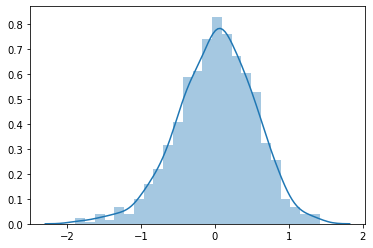

In [114]:
residuals=test_y-test_pred

sns.distplot(residuals)